In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import math as m
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
data=pd.read_excel ('/Users/anandramesh/Desktop/ML/fld.xlsx')         

In [3]:
data.head()

,A,B,C
0,4.202260,3.079934,1
1,7.100692,2.051519,1
2,-2.050935,3.411491,1
3,4.927878,3.676978,1
4,3.712781,3.857733,1


In [4]:
data.describe()

,A,B,C
count,500.000000,500.000000,500.000000
mean,2.146299,2.154970,0.600000
std,2.186602,1.672030,0.490389
min,-3.773446,-4.322572,0.000000
25%,0.608097,1.186131,0.000000
50%,1.784731,2.463797,1.000000
75%,3.488883,3.324288,1.000000
max,11.001539,7.108385,1.000000


### Question 1

### FLD implementation without inbuilt function

In [5]:
#splitting the zeros and ones
zero=data[data['C']==0]

In [6]:
ones=data[data['C']==1]

In [7]:
ones

,A,B,C
0,4.202260,3.079934,1
1,7.100692,2.051519,1
2,-2.050935,3.411491,1
3,4.927878,3.676978,1
4,3.712781,3.857733,1
5,0.075920,2.308841,1
6,2.030459,3.449378,1
7,3.766132,3.100633,1
8,11.001539,3.826070,1
9,9.192649,3.536157,1


In [8]:
a=zero.drop('C', axis=1)
b= ones.drop('C', axis=1)

In [9]:
m1=np.mean(a,0)
m2=np.mean(b,0)

In [10]:
#mean centered
a1_mc=a-m1
b1_mc=b-m2

In [11]:
t1=np.dot(a1_mc.T,a1_mc)
t2=np.dot(b1_mc.T, b1_mc)

In [12]:
#sum of covariances
s=t1+t2

In [13]:
s

array([[1895.34902187,   17.01985477],
       [  17.01985477,  861.95735571]])

In [14]:
#line equation
p=np.dot(np.linalg.inv(s),(m2-m1))
p

array([0.0010449 , 0.00242462])

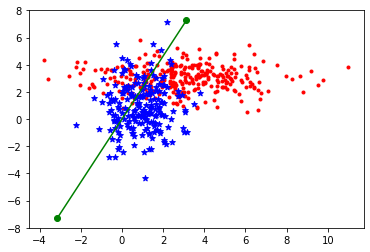

In [15]:
#Plotting the line, values and the error points
plt.scatter(b.iloc[:,0],b.iloc[:,1], c='r', marker='.')
plt.scatter (a.iloc[:,0], a.iloc[:,1], c='b', marker='*')
plt.plot([-3000*p[0],3000*p[0]],[-3000*p[1],3000*p[1]], 'go-')
plt.ion()
plt.show()

In [16]:
#Error with the threshold as 0
threshold=0
pred=(1*np.sign(np.dot(p,data.drop('C', axis=1).T)+threshold)+1)/2
err=sum(pred!=data.C)
err

155

In [17]:
pred!=data.C

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
470     True
471     True
472     True
473     True
474     True
475     True
476     True
477     True
478     True
479     True
480    False
481     True
482     True
483    False
484     True
485     True
486     True
487    False
488    False
489    False
490     True
491    False
492     True
493     True
494     True
495     True
496     True
497     True
498     True
499     True
Name: C, Length: 500, dtype: bool

In [18]:
errindex=np.argwhere(pred!=data.C)
errindex

/Users/anandramesh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


array([[300],
       [302],
       [303],
       [304],
       [305],
       [306],
       [307],
       [308],
       [309],
       [310],
       [312],
       [313],
       [315],
       [316],
       [318],
       [319],
       [320],
       [321],
       [322],
       [324],
       [325],
       [326],
       [327],
       [328],
       [329],
       [330],
       [331],
       [332],
       [333],
       [334],
       [335],
       [337],
       [340],
       [341],
       [342],
       [343],
       [346],
       [347],
       [348],
       [349],
       [351],
       [352],
       [353],
       [356],
       [357],
       [358],
       [359],
       [360],
       [361],
       [364],
       [366],
       [368],
       [369],
       [370],
       [371],
       [372],
       [373],
       [374],
       [378],
       [379],
       [380],
       [383],
       [384],
       [386],
       [387],
       [389],
       [390],
       [391],
       [392],
       [393],
       [397],
      

In [19]:
data.C[327]

0

In [20]:
pred[327]

1.0

In [21]:
indices=[]
for n in errindex: 
    indices.append(n[0])
print(indices)

[300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 313, 315, 316, 318, 319, 320, 321, 322, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 340, 341, 342, 343, 346, 347, 348, 349, 351, 352, 353, 356, 357, 358, 359, 360, 361, 364, 366, 368, 369, 370, 371, 372, 373, 374, 378, 379, 380, 383, 384, 386, 387, 389, 390, 391, 392, 393, 397, 398, 399, 400, 401, 402, 403, 404, 406, 407, 408, 410, 411, 412, 413, 415, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 428, 429, 430, 432, 435, 436, 437, 438, 439, 440, 441, 442, 444, 445, 447, 448, 449, 450, 451, 453, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 484, 485, 486, 490, 492, 493, 494, 495, 496, 497, 498, 499]


In [22]:
u=data.drop('C',1)
u1=u.iloc[indices,:]

In [23]:
pred[113]

1.0

In [24]:
data.C[113]

1

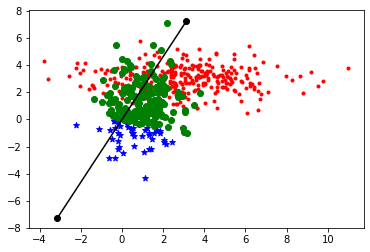

In [25]:
#plotting the error points
plt.scatter(ones.iloc[:,0],ones.iloc[:,1], c='r', marker='.')
plt.scatter (zero.iloc[:,0], zero.iloc[:,1], c='b', marker='*')
plt.plot([-3000*p[0],3000*p[0]],[-3000*p[1],3000*p[1]], 'go-', c='black')
plt.scatter (u1.iloc[:,0], u1.iloc[:,1], c='g', marker='o')
plt.ion()
plt.show()

In [26]:
user_accscore=accuracy_score(pred, data.C)

In [27]:
print('Accuracy score:',user_accscore)

Accuracy score: 0.69


In [28]:
(p[1]-(-p[1]))/(p[0]-(-p[0]))
print('Precision score:-',precision_score(pred, data.C))
print('Thresold for minimum errors:', err)
print('Thresold:', threshold)

Precision score:- 1.0
Thresold for minimum errors: 155
Thresold: 0


In [29]:
print('Confusion matrix:-',confusion_matrix(pred, data.C))

Confusion matrix:- [[ 45   0]
 [155 300]]


### LDA inbuilt prediction

In [30]:
lda=LinearDiscriminantAnalysis()
lda.fit(data.drop('C',1),data.C)
ypred=lda.predict(data.drop('C',1))
direct_acc=accuracy_score(ypred,data.C)
direct_acc

0.84

In [31]:
lda.intercept_

array([-2.95372979])

In [32]:
lda.coef_

array([[0.5203618 , 1.20746117]])

In [33]:
err_lda=sum(ypred!=data.C)
errindex_lda=np.argwhere(ypred!=data.C)

/Users/anandramesh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [34]:
indices_lda=[]
for n in errindex_lda: 
    indices_lda.append(n[0])
l=data.drop('C',1)
l1=u.iloc[indices_lda,:]
#print(l1)
print('Error count:',err_lda)
print('Thresold for minimum errors:', threshold)
print('Precision score:-',precision_score(ypred, data.C))
print('Confusion matrix:-',confusion_matrix(ypred, data.C))

Error count: 80
Thresold for minimum errors: 0
Precision score:- 0.9
Confusion matrix:- [[150  30]
 [ 50 270]]


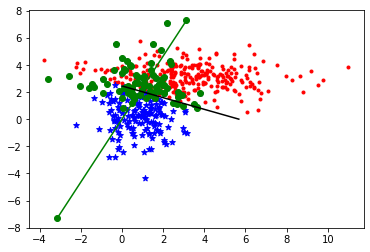

In [35]:
#plotting the determinant line(from mathemcatical implementation), classifier line(from inbuilt) and error points
plt.scatter(ones.iloc[:,0],ones.iloc[:,1], c='r', marker='.')
plt.scatter (zero.iloc[:,0], zero.iloc[:,1], c='b', marker='*')
plt.scatter (l1.iloc[:,0], l1.iloc[:,1], c='g', marker='o')
plt.plot([-3000*p[0],3000*p[0]],[-3000*p[1],3000*p[1]], 'go-')
plt.plot([0,-1*lda.intercept_/lda.coef_[0][0]],[-1*lda.intercept_/lda.coef_[0][1],0], 'black')
plt.ion()
plt.show()

## Comparison 

In [36]:
slope1= (3000*p[1]-(-3000*p[1]))/(3000*p[0]-(-3000*p[0]))
slope2= float((0-(lda.intercept_/lda.coef_[0][1]))/(lda.intercept_/lda.coef_[0][0])-0)
overall_slope=slope1*slope2

In [37]:
print('Slope of discriminant line in first implementation:',slope1)
print('Slope of classification line in inbuilt implementation',slope2)
print('Slope for the perpendicular line:', overall_slope)

Slope of discriminant line in first implementation: 2.3204262487784626
Slope of classification line in inbuilt implementation -0.43095530423620587
Slope for the perpendicular line: -1.0000000000000002


## Question 2

In [38]:
data2=pd.read_excel ('/Users/anandramesh/Desktop/ML/spam.xlsx')         

In [39]:
data2.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [40]:
data2.describe

<bound method NDFrame.describe of      Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
0       0.00     0.64     0.64        0     0.32     0.00     0.00     0.00   
1       0.21     0.28     0.50        0     0.14     0.28     0.21     0.07   
2       0.06     0.00     0.71        0     1.23     0.19     0.19     0.12   
3       0.00     0.00     0.00        0     0.63     0.00     0.31     0.63   
4       0.00     0.00     0.00        0     0.63     0.00     0.31     0.63   
5       0.00     0.00     0.00        0     1.85     0.00     0.00     1.85   
6       0.00     0.00     0.00        0     1.92     0.00     0.00     0.00   
7       0.00     0.00     0.00        0     1.88     0.00     0.00     1.88   
8       0.15     0.00     0.46        0     0.61     0.00     0.30     0.00   
9       0.06     0.12     0.77        0     0.19     0.32     0.38     0.00   
10      0.00     0.00     0.00        0     0.00     0.00     0.96     0.00   
11      0.00     0

In [41]:
zero1=data2[data2['Column58']==0]
ones1=data2[data2['Column58']==1]

In [42]:
a1=zero1.drop('Column58', axis=1)
b1= ones1.drop('Column58', axis=1)

In [43]:
mean1=np.mean(a1,0)
mean2=np.mean(b1,0)

In [44]:
#mean centered
a1_mc1=a1-mean1
b1_mc1=b1-mean2

In [45]:
mean2.shape

(57,)

In [46]:
e1=np.dot(a1_mc1.T,a1_mc1)
e2=np.dot(b1_mc1.T, b1_mc1)

In [47]:
w=e1+e2

In [48]:
w

array([[ 6.83516030e+01, -1.96891680e+00,  6.58726900e+00, ...,
         2.43554435e+02,  2.49019246e+03,  9.60530684e+03],
       [-1.96891680e+00,  1.00522122e+02,  3.57385880e+00, ...,
         1.04155784e+03,  4.30042688e+03,  8.69451112e+03],
       [ 6.58726900e+00,  3.57385880e+00,  2.24378934e+02, ...,
        -2.06142566e+02,  2.50622740e+02, -7.93152004e+03],
       ...,
       [ 2.43554435e+02,  1.04155784e+03, -2.06142566e+02, ...,
         2.35073814e+06,  4.98945904e+06,  4.45423594e+06],
       [ 2.49019246e+03,  4.30042688e+03,  2.50622740e+02, ...,
         4.98945904e+06,  2.00373349e+07,  3.72157907e+07],
       [ 9.60530684e+03,  8.69451112e+03, -7.93152004e+03, ...,
         4.45423594e+06,  3.72157907e+07,  2.69362810e+08]])

In [49]:
pr=np.dot(np.linalg.inv(w),(mean2-mean1))

In [50]:
pr

array([-1.70567697e-03,  1.57783281e-04,  4.97915767e-04,  5.66543387e-04,
        1.12998453e-03,  8.66425751e-04,  8.15065133e-04,  9.96144113e-04,
       -1.05352158e-04, -5.01655017e-05,  1.44373787e-03, -5.11193462e-04,
        1.93084708e-05, -3.31030360e-04,  1.55489704e-04,  8.96329490e-04,
        2.40646914e-04,  9.57012514e-04,  3.02404100e-04,  3.84938689e-04,
        3.83460791e-04,  5.88996034e-04,  2.14588977e-03,  2.44314172e-03,
       -2.92520831e-04, -3.51567260e-04, -1.61759237e-04, -6.22916261e-05,
        1.95393014e-04, -1.01863964e-03,  3.77305898e-04,  7.41381124e-04,
       -1.22068059e-03,  7.58505827e-04, -5.10049358e-04, -2.64045282e-04,
       -1.27868034e-04,  1.97306012e-03, -7.95656749e-04, -4.47221778e-04,
        1.41781619e-03, -8.45858048e-04, -4.10897838e-04, -5.11143359e-04,
        9.26294516e-05, -1.96281551e-03, -1.23195142e-03, -2.56262230e-03,
       -3.36599495e-04,  5.89749317e-04, -1.43932085e-03,  2.35273457e-03,
        2.68952454e-03, -

In [58]:
#with initial threshold as 0
threshold_data2=0
pred_s=(1*np.sign(np.dot(pr,data2.drop('Column58', axis=1).T)+threshold)+1)/2
err_s=sum(pred_s!=data2.Column58)
print('Error count:',err_s)
print('Thresold:', threshold_data2)

Error count: 183
Thresold: 0


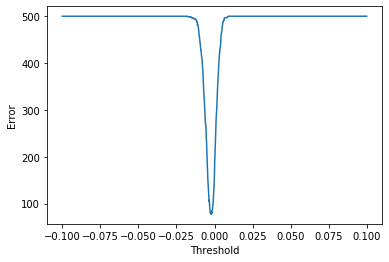

Thresold for minimum errors: -0.00239999999999721
Error count with ideal threshold: 78


In [59]:
#trial and error for the threshold using loop
err=[]
thresh=[]
for i in np.arange(-0.1, 0.1,0.0001):
    pred_s=(1*np.sign(np.dot(pr,data2.drop('Column58', axis=1).T)+i)+1)/2
    err_s=sum(pred_s!=data2.Column58)
    err.append(err_s)
    thresh.append(i)
plt.plot(thresh,err)
plt.xlabel('Threshold')
plt.ylabel('Error')
plt.ion()
plt.show()
print('Thresold for minimum errors:', thresh[err.index(min(err))])
print('Error count with ideal threshold:',min(err))

In [55]:
pred_s=(1*np.sign(np.dot(pr,data2.drop('Column58', axis=1).T)+i)+1)/2
err_s=sum(pred_s!=data2.Column58)
print('Precision score',precision_score(pred_s, data2.Column58))
print('Confusion matrix:',confusion_matrix(pred_s,data2.Column58))

Precision score 1.0
Confusion matrix: [[  0   0]
 [500 500]]
